# R-Squared

R-squared is a regression metric. It has the following formula:

$$
    R^2 = 1 - \frac{RSS}{TSS}.
$$

Where $RSS$ is the sum of squared residuals and $TSS$ is the total sum of squares.

In other words, $RSS$ is the total squared difference between the target values
$y$ and the predictions $y_i$. Mathematically, this is:

$$
    RSS = \sum_{i = 0}^{n} (y_i - \hat{y}_i) ^ 2.
$$

$TSS$ is the total difference between $y$ and the mean of $y$ which we denote as $\bar{y}$. Mathematically, this is:

$$
    TSS = \sum_{i = 0}^{n} (y - \bar{y}) ^ 2.
$$

The quotient in the $R^2$ formula compares our model with a baseline that is
just the mean of $y$. If our model is better at predicting $y$ than the mean
$\bar{y}$, then $RSS$ will be smaller than $TSS$ and therefore the quotient
$\frac{RSS}{TSS}$ will be less than 1.

If the model is not better at predicting $y$ than the mean $\bar{y}$, then $TSS$
will be smaller than $RSS$ and $\frac{RSS}{TSS}$ will be greater than 1.

Why in the $R^2$ formula do we take $\frac{RSS}{TSS}$ from 1? It makes it easier
to interpret. If our model outperforms the mean $\bar{y}$ then $R^2$ will be
between 0 and 1. The closer the 1 the better. If our model is not better than
the mean $\bar{y}$ then $R^2$ will be less than 0.

# Example 1: Linear Target

Suppose we have data that is generated from the following underlying process:

$$
    y = 0.5 x + 1 + \epsilon
$$

Where $\epsilon$ is a noise term. Let us model it with a simple linear
regression model. Create the data and fit the model.

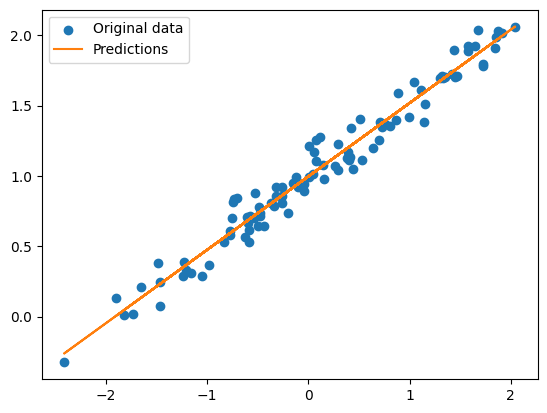

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

n = 100
x = np.random.normal(0, 1, n).reshape(-1, 1)
epsilon = np.random.normal(0, 0.1, n).reshape(-1, 1)
y = 0.5 * x + 1 + epsilon

model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], y, label="Original data", color="tab:blue")
ax.plot(x[:, 0], y_hat, label="Predictions", color="tab:orange")
ax.legend();

Create a function for computing $R^2$.

In [3]:
def r_squared(y_true, y_pred):
    rss = ((y_true - y_pred) ** 2).sum()
    tss = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - rss / tss

Compute the $R^2$ score for our model's predictions.

In [4]:
r_squared(y, y_hat)

0.9661874237889019

The $R^2$ is close to 1 to our model is very good.

## R Squared On Small Datasets Can Give Strange Results

$R^2$ compares the model predictions with the mean of the target variable. For
small datasets, this mean may not reflect that of the underlying probability
distribution.

For example suppose we model a cubic function.

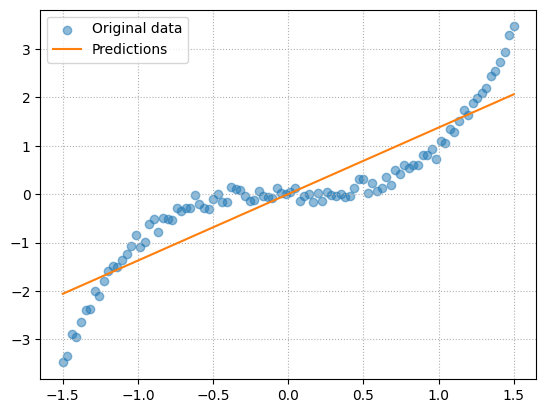

In [51]:
n = 100
x = np.linspace(-1.5, 1.5, 100).reshape(-1, 1)
x = np.sort(x)
epsilon = np.random.normal(0, 0.1, n).reshape(-1, 1)
y = x ** 3 + epsilon

model = LinearRegression()
model.fit(x, y)
y_hat = model.predict(x)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], y, label="Original data", color="tab:blue", alpha=0.5)
ax.plot(x[:, 0], y_hat, label="Predictions", color="tab:orange")
ax.legend()
ax.grid(linestyle=":")

Even though we have modelled our cubic function with a straight line, it is not
a bad approximation. Calculate the $R^2$ for our predictions.

In [77]:
r_squared(y, y_hat)

0.827909114372573

The model fit is quite good. However, if we choose a very small specific subset
of the training data, we can get an extrememly negative $R^2$ value.

In [79]:
mask = (x > 0.5) & (x < 0.7)
x_test = x[mask].reshape((-1, 1))
y_test = y[mask]
y_test_pred = model.predict(x_test)

r_squared(y_test, y_test_pred)

-214.9338556085192

Plot these data points and their mean.

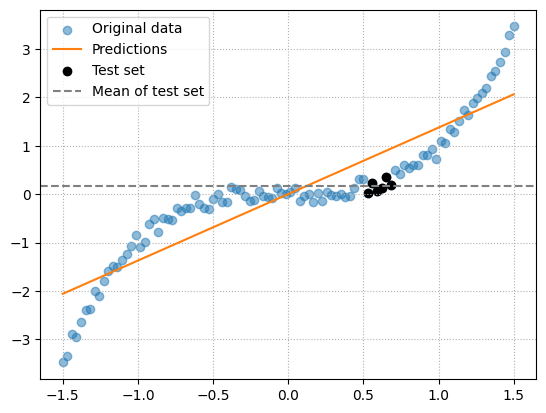

In [80]:
y_test_mean = y_test.mean()

fig, ax = plt.subplots()
ax.scatter(x[:, 0], y, label="Original data", color="tab:blue", alpha=0.5)
ax.plot(x[:, 0], y_hat, label="Predictions", color="tab:orange")
ax.scatter(x_test[:, 0], y_test, label="Test set", color="black")
ax.axhline(y_test_mean, color="gray", linestyle="--", label="Mean of test set")

ax.legend()
ax.grid(linestyle=":")

For this small subset of data points, the mean is a better approximation than
our model. So, according to $R^2$, our model is terrible.

This is an unrealistic example but suppose you are predicting house
prices in the UK. Suppose you want to see how well your model performs in a
certain post code which contains 30 houses. The mean house price for that post
code is probably going to be a good approximate and maybe better than a model
trained on prices from the whole of the UK which will lead to negative $R^2$.

If you are using $R^2$ on a small subset of your entire population you should be
aware that your $R^2$ may be extremely negative if your subset is not
representative of your whole population.